# HW02
### Основная часть

#### 1.1 Загрузка данных и первичный осмотр

In [76]:
import pandas as pd

file = 'S02-hw-dataset.csv'
data = pd.read_csv(file)
print("Первые 5 строк датасета:\n", data.head())
print("\nИнформация о фрейме:")
print(data.info())
print("\nБазовые описательные статистики:\n", data.describe())

Первые 5 строк датасета:
    user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

Информация о фрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

Базовые описательные статистики:
          user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189

#### 1.2 Пропуски и дубликаты

##### 1.2.1 Доля пропусков

In [77]:
print("Доля пропусков в каждом столбце")
print(data.isna().mean())

Доля пропусков в каждом столбце
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


##### 1.2.2 Проверка на наличие дублирующихся строк

In [78]:
print("Дублирующиеся строки:")
print(data[data.duplicated()])

Дублирующиеся строки:
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


##### 1.2.3 Нереалистичные (подозрительные) значения

In [79]:
print("Нереалистичный возраст:\n")
print(data[(data['age'] < 10) | (data['age'] > 100)], "\n")
print("Пропуски в возрасте:\n")
print(data[data['age'].isnull()])
print("Несоответствие покупок и выручки:\n")
print(data[(data['purchases'] <= 0) & (data['revenue'] > 0) | (data['purchases'] > 0) & (data['revenue'] <= 0) ], "\n")
print("")

Нереалистичный возраст:

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488 

Пропуски в возрасте:

    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630
Несоответствие покупок и выручки:

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0 




В данных обнаружены несколько типов проблем качества. Во-первых, присутствуют пропуски в возрасте, нереалистичные значения (например, возраст 120 и возраст 5), а также отрицательное количество покупок, что указывает на ошибки ввода или загрузки данных. Во-вторых, выявлено логическое противоречие — случаи, когда покупок больше нуля, но доход равен нулю, что нарушает бизнес-логику.

Кроме того, в датасете найден точный дубликат строки с одинаковым user_id и значениями полей.

#### 1.3 Базовый EDA

##### 1.3.1 Частоты категориальных переменных

In [80]:
print("Частота стран:\n")
print(data['country'].value_counts())

Частота стран:

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


##### 1.3.2 Группировка

In [81]:
print("Среднее количество покупок и выручки в разрезе стран:\n")
print(data.groupby('country')[['purchases', 'revenue']].agg(['mean', 'sum']))

Среднее количество покупок и выручки в разрезе стран:

        purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459


##### 1.3.3 Группировка с коридорами

In [82]:
bins = [0, 20, 30, 40, 50, 100]
labels = ['≤20', '21–30', '31–40', '41–50', '51–100']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)
print("Среднее количество покупок и выручки в разрезе возрастных групп:\n")
print(data.groupby('age_group', observed=True)[['purchases', 'revenue']].agg(['mean', 'sum']))

Среднее количество покупок и выручки в разрезе возрастных групп:

          purchases          revenue       
               mean sum         mean    sum
age_group                                  
≤20        6.333333  19  1414.666667   4244
21–30      4.250000  51   475.000000   5700
31–40      6.000000  66  1216.272727  13379
41–50      3.000000  18   668.000000   4008
51–100     5.000000  30   596.666667   3580


В данных чаще всего встречаются пользователи из RU и FR, тогда как CN представлена минимально. Средние значения показывают, что страны и возрастные группы немного отличаются по уровню покупок и выручки: наиболее активны пользователи среднего возраста, а молодая группа (≤20) даёт меньшие значения из-за небольшого числа наблюдений. В целом различия между категориями есть, но без резких аномалий.

#### 1.4 Визуализация данных в Matplotlib

##### 1.4.1 Гистограмма для количественного признака

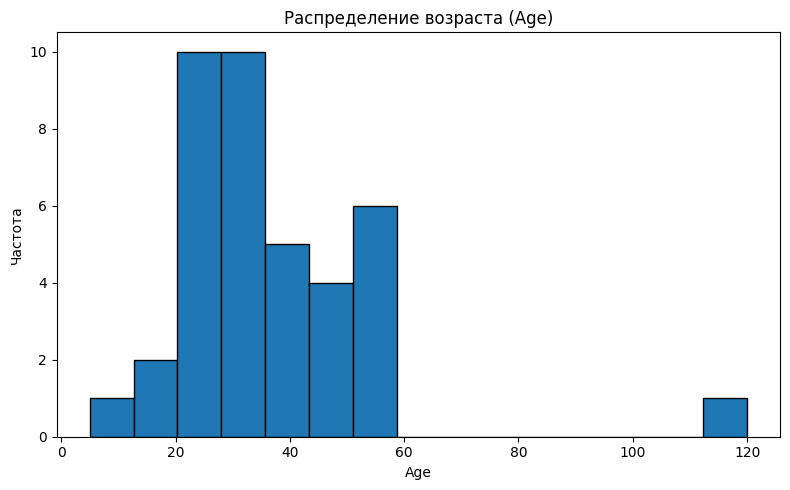

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data['age'], bins=15, edgecolor='black')
plt.title('Распределение возраста (Age)')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.tight_layout()

# Сохранение
plt.savefig('figures/age_hist.png', dpi=120)
plt.show()

Гистограмма показывает распределение возраста пользователей. Видно, что большинство значений сконцентрированы в диапазоне 20–50 лет, при этом встречаются отдельные экстремальные значения (например, 5 и 120), которые выглядят как аномалии и подтверждают проблемы качества данных. Распределение в целом умеренно равномерное, без выраженных пиков.

##### 1.4.2 Боксплот

<Figure size 800x500 with 0 Axes>

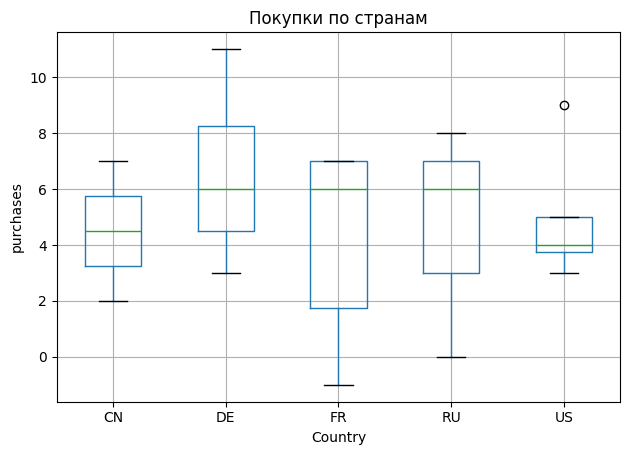

In [84]:
plt.figure(figsize=(8,5))
data.boxplot(column='purchases', by='country')
plt.title('Покупки по странам')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('purchases')
plt.tight_layout()
plt.tight_layout()
plt.show()

График показывает, как отличаются покупки в разных странах. У одних стран значения более высокие и разбросанные, у других — ниже и более стабильные. То есть пользователи из разных стран покупают по-разному.

##### 1.4.3 Диаграмма рассеяния

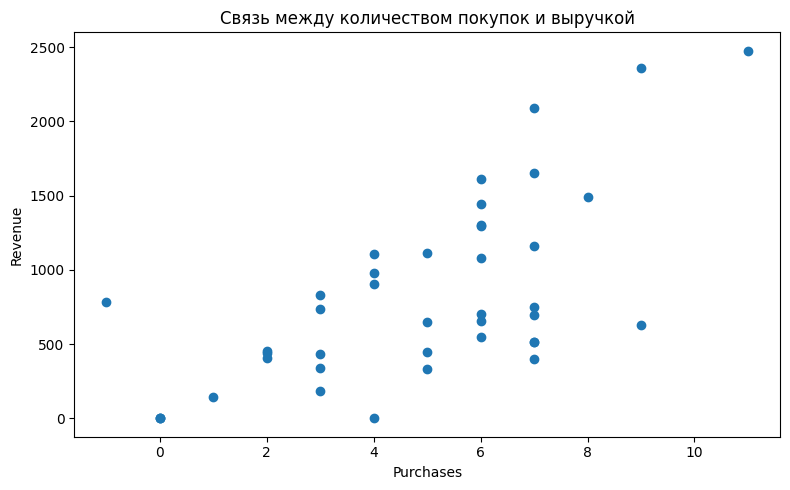

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(data['purchases'], data['revenue'])
plt.title('Связь между количеством покупок и выручкой')
plt.xlabel('Purchases')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

Диаграмма рассеяния показывает ожидаемую зависимость: большему количеству покупок обычно соответствует более высокой выручке, хотя есть отдельные выбросы и нулевые значения.